In [1]:
ROOT = "/content/drive/MyDrive/Colab Notebooks"

In [2]:
import os
os.chdir(ROOT)

In [3]:
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks'

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
import pandas as pd

plt.style.use("fivethirtyeight")

In [11]:
class Perceptron :
  def __init__(self, eta, epochs, activationFunction):
    self.weights = np.random.randn(3)*1e-4
    self.eta = eta
    self.epochs = epochs
    self.activationFunction = activationFunction

  def fit(self, X, y):
    self.X = X
    self.y = y

    X_with_bias = np.c_[self.X, -np.ones((len(self.X), 1))]

    for epoch in range(self.epochs):
      y_hat = self.activationFunction(X_with_bias, self.weights)
      error = self.y - y_hat
      self.weights = self.weights + self.eta * np.dot(X_with_bias.T, error)



  def predict(self, X):
    X_with_bias = np.c_[X, -np.ones((len(self.X), 1))]
    return self.activationFunction(X_with_bias, self.weights)

In [10]:
activationFunction = lambda inputs, weights : np.where(np.dot(inputs, weights) > 0, 1, 0)

AND

In [6]:
data = {"x1": [0,0,1,1], "x2":[0,1,0,1], "y":[0,0,0,1]}
AND = pd.DataFrame(data)
AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [7]:
X = AND.drop("y", axis=1)
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [9]:
y = AND['y']
y.to_frame()

,y
0,0
1,0
2,0
3,1


In [13]:
model = Perceptron(eta=0.01, epochs=10, activationFunction = activationFunction )

In [14]:
model.fit(X,y)

In [15]:
model.predict(X)

array([0, 0, 0, 1])

OR

In [16]:
data = {"x1": [0,0,1,1], "x2": [0,1,0,1], "y": [0,1,1,1]}

OR = pd.DataFrame(data)
OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [17]:
X = OR.drop("y", axis=1) # axis = 1 >>> dropping accross column
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [18]:
y = OR['y']
y.to_frame()

,y
0,0
1,1
2,1
3,1


In [19]:
model = Perceptron(eta = 0.5, epochs=10, activationFunction=activationFunction)

In [20]:
model.fit(X,y)

XOR

In [21]:
data = {"x1": [0,0,1,1], "x2": [0,1,0,1], "y": [0,1,1,0]}

XOR = pd.DataFrame(data)
XOR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [22]:
X = XOR.drop("y", axis=1) # axis = 1 >>> dropping accross column
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [23]:
y = XOR['y']
y.to_frame()

,y
0,0
1,1
2,1
3,0


In [24]:
model = Perceptron(eta = 0.5, epochs=50, activationFunction=activationFunction)


In [25]:
model.fit(X,y)

In [26]:
model.predict(X)

array([1, 1, 1, 1])

Analysis with the graph

### AND GATE

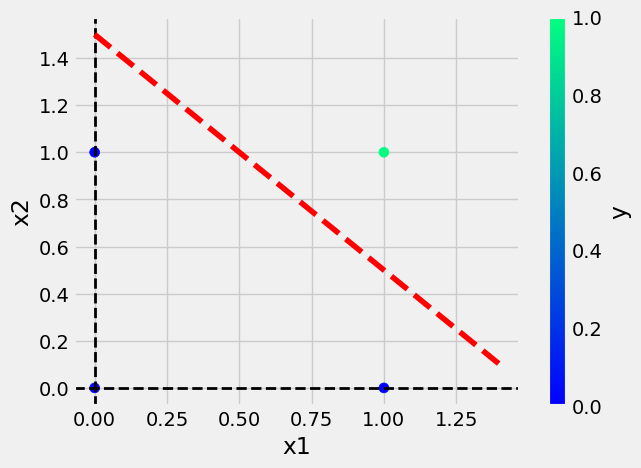

In [28]:
AND.plot(kind="scatter", x="x1", y="x2", c="y", s=50, cmap="winter")
plt.axhline(y=0, color="black", linestyle="--", linewidth=2)
plt.axvline(x=0, color="black", linestyle="--", linewidth=2)

x = np.linspace(0, 1.4) # >>> 50
y = 1.5 - 1*np.linspace(0, 1.4) # >>> 50

plt.plot(x, y, "r--")

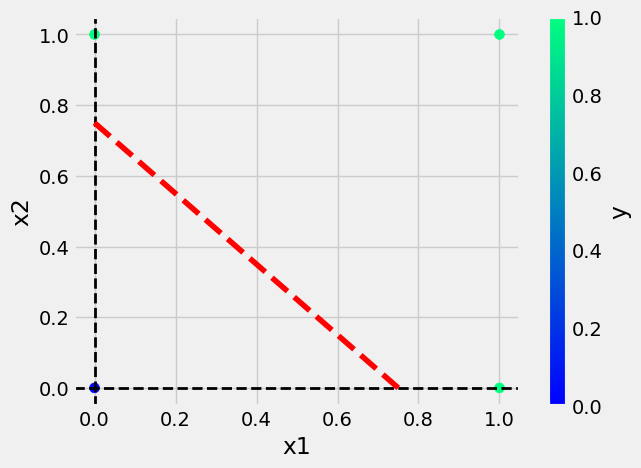

In [29]:
OR.plot(kind="scatter", x="x1", y="x2", c="y", s=50, cmap="winter")
plt.axhline(y = 0, color ="black", linestyle ="--", linewidth=2)
plt.axvline(x = 0, color ="black", linestyle ="--", linewidth=2)
plt.plot(np.linspace(0,0.75), 0.75 - 1*np.linspace(0,0.75), 'r--');

<Axes: xlabel='x1', ylabel='x2'>

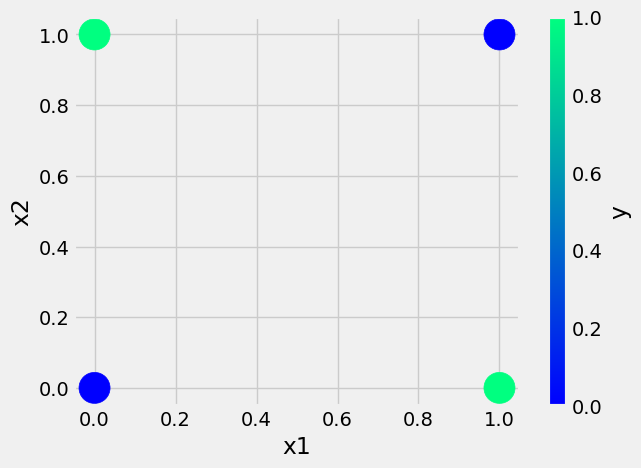

In [30]:
XOR.plot(kind="scatter", x="x1", y="x2", c="y", s=500, cmap="winter")
